In [1]:
import json 
import pandas as pd

#### Loading datasets - reading from json files -- LOADED ONCE, DO NOT RUN AGAIN. LOAD FROM TABLES ALREADY CREATED. 
##### Scroll down and load dataset from existing CSVs <a href = "#load_from_table">Go here</a><br />

In [1]:

dataset_reviews, dataset_business, dataset_checkin, dataset_tip, dataset_user = [],[],[],[],[]

with open('yelp_academic_dataset_review.json', 'r',encoding="utf8") as f:
    for line in f:
        data = json.loads(line)   
        dataset_reviews.append(data)
with open('yelp_academic_dataset_business.json', 'r',encoding="utf8") as f:
    for line in f:
        data = json.loads(line)   
        dataset_business.append(data)
# with open('yelp_academic_dataset_checkin.json', 'r',encoding="utf8") as f:
#     for line in f:
#         data = json.loads(line)   
#         dataset_checkin.append(data)
# with open('yelp_academic_dataset_tip.json', 'r',encoding="utf8") as f:
#     for line in f:
#         data = json.loads(line)   
#         dataset_tip.append(data)
# with open('yelp_academic_dataset_user.json', 'r',encoding="utf8") as f:
#     for line in f:
#         data = json.loads(line)   
#         dataset_user.append(data)

#### Filtering business IDs of restaurants in the US

In [16]:

rlist = list(dataset_business) # business dataset

foodList=['Food','Foods','Bars','Chinese','Japanese','Mexican','Vietnamese','Seafood','Sushi','Indian','Spicy','Ramen',
         'Imported Food', 'Breakfast & Brunch','Fast Food','Bars','Pub','Italian','Restaurant','Pizza','Bakeries','Chicken Wings',
         'Sandwiches','Salad','Patisserie','Cake Shop','Juice Bars', 'Smoothies','Vegan','Coffee & Tea','Ice Cream','Yogurt',
         'Steakhouses','American','Desserts','Cupcakes','Delis','Beer','Wine','Spirits','Korean','Cafe','Canadian',
         'Portugese','Tex-Mex','Asian','Vegetarian','Soups','Chocolatiers','Mediterranean','Turkish','Cajun','Gluten',
         'Barbeque','Buffets','Wraps','Pakistani','Taiwanese','Soul Food','Bubble Tea','Halal','Noodles','Tea','Kosher','Fish'
         ,'Kebab','Hot Pot','Breweries','Restaurants'] # keywords to filter category of businesses
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"] # filtering US states


idList=[] # to store filtered business IDs
for i in rlist:
    if not i['categories'] is None:
        if any(ext in i['categories'] for ext in foodList) and any(t in i['state'] for t in states):
            idList.append(i['business_id'])
            
len(idList)

49690

#### Reviews - converting to DataFrame

In [17]:

reviews_review_id, reviews_user_id, reviews_business_id, reviews_stars, reviews_review_text, \
reviews_dates = [],[],[],[],[],[]
for record in dataset_reviews:
    reviews_review_id.append(record[u'review_id'])
    reviews_user_id.append(record[u'user_id'])
    reviews_business_id.append(record[u'business_id'])
    reviews_stars.append(record[u'stars'])
    reviews_review_text.append(record[u'text'])
    reviews_dates.append(record[u'date'])
    
print(len(dataset_reviews))
print(len(reviews_review_id))
print(len(reviews_review_text))

dataset_reviews_dict = {'review_id':reviews_review_id, 'user_id':reviews_user_id, 'business_id':reviews_business_id, \
                        'stars':reviews_stars, 'review_text':reviews_review_text, 'review_date':reviews_dates}
reviews_df = pd.DataFrame(dataset_reviews_dict)
print(reviews_df.head())
print(reviews_df.shape)

reviews_df = reviews_df[reviews_df['business_id'].isin(idList)]
print(reviews_df.head())
print(reviews_df.shape)

reviews_df.to_csv(r'reviews_table.csv')

6685900
6685900
6685900
                review_id                 user_id             business_id  \
0  Q1sbwvVQXV2734tPgoKj4Q  hG7b0MtEbXx5QzbzE6C_VA  ujmEBvifdJM6h6RLv4wQIg   
1  GJXCdrto3ASJOqKeVWPi6Q  yXQM5uF2jS6es16SJzNHfg  NZnhc2sEQy3RmzKTZnqtwQ   
2  2TzJjDVDEuAW6MR5Vuc1ug  n6-Gk65cPZL6Uz8qRm3NYw  WTqjgwHlXbSFevF32_DJVw   
3  yi0R0Ugj_xUx_Nek0-_Qig  dacAIZ6fTM6mqwW5uxkskg  ikCg8xy5JIg_NGPx-MSIDA   
4  11a8sVPMUFtaC7_ABRkmtw  ssoyf2_x0EQMed6fgHeMyQ  b1b1eb3uo-w561D0ZfCEiQ   

   stars                                        review_text  \
0    1.0  Total bill for this horrible service? Over $8G...   
1    5.0  I *adore* Travis at the Hard Rock's new Kelly ...   
2    5.0  I have to say that this office really has it t...   
3    5.0  Went in for a lunch. Steak sandwich was delici...   
4    1.0  Today was my second out of three sessions I ha...   

           review_date  
0  2013-05-07 04:34:36  
1  2017-01-14 21:30:33  
2  2016-11-09 20:09:03  
3  2018-01-09 20:56:38  
4  2018-0

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

#### Business - converting to DataFrame

In [21]:

# did not take some attributes (table service, noise level etc.)

business_business_id, business_name, business_address, business_city, business_state, business_postal_code,\
business_stars, business_review_count, business_categories, business_attributes = [],[],[],[],[],[],[],[],[],[]
for record in dataset_business:
    business_business_id.append(record[u'business_id'])
    business_name.append(record[u'name'])
    business_address.append(record[u'address'])
    business_city.append(record[u'city'])
    business_state.append(record[u'state'])
    business_postal_code.append(record[u'postal_code'])
    business_stars.append(record[u'stars'])
    business_review_count.append(record[u'review_count'])
    business_categories.append(record[u'categories'])
    business_attributes.append(record[u'attributes'])
    
print(len(dataset_business))
print(len(business_business_id))
print(len(business_categories))

dataset_business_dict = {'business_id':business_business_id, 'business_name':business_name, 'business_address':business_address,\
                      'city':business_city, 'state':business_state, 'postal_code':business_postal_code,\
                      'stars':business_stars, 'review_count':business_review_count, 'attributes':business_attributes}
business_df = pd.DataFrame(dataset_business_dict)
print(business_df.head())
print(business_df.shape)

business_df = business_df[business_df['business_id'].isin(idList)]
print(business_df.head())
print(business_df.shape)

business_df.to_csv('business_table.csv')

192609
192609
192609
              business_id                    business_name  \
0  1SWheh84yJXfytovILXOAQ       Arizona Biltmore Golf Club   
1  QXAEGFB4oINsVuTFxEYKFQ       Emerald Chinese Restaurant   
2  gnKjwL_1w79qoiV3IC_xQQ      Musashi Japanese Restaurant   
3  xvX2CttrVhyG2z1dFg_0xw  Farmers Insurance - Paul Lorenz   
4  HhyxOkGAM07SRYtlQ4wMFQ              Queen City Plumbing   

                 business_address         city state postal_code  stars  \
0     2818 E Camino Acequia Drive      Phoenix    AZ       85016    3.0   
1            30 Eglinton Avenue W  Mississauga    ON     L5R 3E7    2.5   
2       10110 Johnston Rd, Ste 15    Charlotte    NC       28210    4.0   
3   15655 W Roosevelt St, Ste 237     Goodyear    AZ       85338    5.0   
4  4209 Stuart Andrew Blvd, Ste F    Charlotte    NC       28217    4.0   

   review_count                                         attributes  
0             5                           {'GoodForKids': 'False'}  
1           128  

<a id = "load_from_table"></a>

#### Loading datasets - from tables already created

In [4]:
import pandas as pd
# dataset_business = pd.read_csv("business_table.csv")
dataset_reviews = pd.read_csv("reviews_table.csv")
# dataset_business = pd.read_csv('business_1.csv')

# dropping unwanted columns
# dataset_business = dataset_business.drop(columns=['Unnamed: 0','Unnamed: 0.1'])
dataset_reviews = dataset_reviews.drop(columns=['Unnamed: 0'])

# merging the 2 datasets on business_id
# dataset = pd.merge(left=dataset_business,right=dataset_reviews,left_on='business_id',right_on='business_id')

FileNotFoundError: [Errno 2] File b'reviews_table.csv' does not exist: b'reviews_table.csv'

In [50]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn

biz_id_wc = 'gnKjwL_1w79qoiV3IC_xQQ'
data_wc = dataset.copy()
data_wc = data_wc.loc[data_wc['business_id']==biz_id_wc]
review_list = list(data_wc['review_text'])
review_list

['Husband was craving Chicken Teriyaki & gyoza, so we found Musashi. I was very unimpressed. We started with gyoza and edamame. Neither were anything special. We then ordered a chicken teriyaki plate and a few sushi rolls. The chicken teriyaki was nothing more than some boiled chicken smothered in teriyaki sauce. Was not good at all. The sushi was mediocre at best. While they were friendly and the service was pretty good - I will not be back.',
 'Went there Saturday noon they open at 12pm but people were waiting outside before 12pm so you can tell it should be a good place. Nice Katsu & Eel with rice. Many Japanese go there.',
 'Went to this restaurant on Saturday as I had a craving for a Japanese ramen. It was packed for Saturday dinner. We were seated at the bar and ordered soft shell crab roll, donkotsu ramen and katsu jyu(pork cutlet with egg). \n\nAfter soft shell crab roll was served first, we waited for 30minutes for other dishes. They said it was a little busy but they should h

In [51]:

token_d, lemmatized_token_d, stop_words_removed= [],[],[]

# tokenize

for i in range(len(review_list)):
    d = review_list[i].lower()
    token_d.append(nltk.word_tokenize(d))

# lemmatize    

lemmatizer = nltk.stem.WordNetLemmatizer()
for token_list in token_d:
    temp=[]
    for token in token_list:
        if token.isalpha(): temp.append(lemmatizer.lemmatize(token))
    lemmatized_token_d.append(temp)
    
# removing stop words

for token_list in lemmatized_token_d:
    temp=[token for token in token_list if not token in stopwords.words('english') if token.isalpha()]
    stop_words_removed.append(temp)

# converting into tf-idf vectors. Min freq = half of the number of reviews

vectorizer2 = TfidfVectorizer(ngram_range=1, min_df=len(review_list)/2)

temp_list=[]
for token_list in stop_words_removed:
    temp_list.append(' '.join(token_list))

temp_list

# vectorizer2.fit(temp_list)
# v2 = vectorizer2.transform(temp_list)

# # v2 = fit_transform(temp_list)
# tf_idf = v2.toarray()

# print(tf_idf.shape)

['husband wa craving chicken teriyaki gyoza found musashi wa unimpressed started gyoza edamame neither anything special ordered chicken teriyaki plate sushi roll chicken teriyaki wa nothing boiled chicken smothered teriyaki sauce wa good sushi wa mediocre best friendly service wa pretty good back',
 'went saturday noon open people waiting outside tell good place nice katsu eel rice many japanese go',
 'went restaurant saturday craving japanese ramen wa packed saturday dinner seated bar ordered soft shell crab roll donkotsu ramen katsu jyu pork cutlet egg soft shell crab roll wa served first waited dish said wa little busy managed kitchen better way weekend serving lady wa kind enough bring complimentary edamame waiting ramen wa served soup wa rich salty wa day bad cook put salt accident liked noodle though katsu jyu wa bento box style katsu wa okay crispy enough maybe expected much authentic japanese ramen donkotsu heard owner wa japanese better leaf lot desired food service',
 'place 

In [59]:
import numpy as np

rating_list = list(data_wc['stars_y'])

word_wc, word_wc_rating = [],[]

for i in range(len(rating_list)):
    for j in range(len(stop_words_removed[i])):
        word_wc.append(stop_words_removed[i][j])
        word_wc_rating.append(rating_list[i])

d = {'word':word_wc,'word_rating':word_wc_rating}
df = pd.DataFrame(d)
n = df['word'].value_counts()
counts = {'word':list(n.index),'word_counts':list(n.values)}
counts = pd.DataFrame(counts)
df = df.groupby(['word'], as_index=False).agg({'word_rating':np.mean})
df = df.rename({'word_rating':'avg_word_rating'}, axis=1)

df = pd.merge(left=df, right=counts, left_on='word', right_on='word')
df['word_plus_rating'] = df['word'] + round(df['avg_word_rating'],1).astype(str)
df.sort_values(by='word_counts', ascending=False)

,word,avg_word_rating,word_counts,word_plus_rating
1975,wa,3.272989,348,wa3.3
946,japanese,4.189300,243,japanese4.2
1777,sushi,3.679775,178,sushi3.7
1341,place,3.950920,163,place4.0
714,food,4.190184,163,food4.2
...,...,...,...,...
924,injustice,4.000000,1,injustice4.0
923,initial,5.000000,1,initial5.0
921,informative,3.000000,1,informative3.0
920,infested,1.000000,1,infested1.0


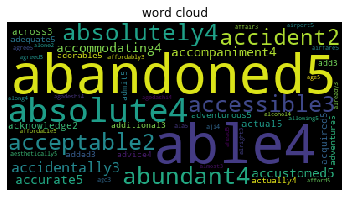

In [60]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wc = WordCloud(max_words=1000).generate(' '.join(list(df['word_plus_rating'][:50])))

plt.title("word cloud")
plt.imshow(wc)
plt.axis("off")
plt.show()